# Solution : Projet de prédiction de prix de vente de maisons

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn import linear_model


pd.set_option('display.max_columns', 500)

In [11]:
data = pd.read_csv("AmesHousing.tsv", delimiter='\t')

In [12]:
print(data.shape)

(2930, 82)


Dans la base de données, on 82 colonnes et 2930 lignes

In [13]:
print(len(str(data.shape))*'-')

----------


In [14]:
print(data.dtypes.value_counts())

object     43
int64      28
float64    11
dtype: int64


- On a 43 colonnes de type text
- On a 28 colonnes de type entier
- On a 11 colonnes de type nombre à virgule

In [15]:
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [16]:
# Pour le moment, cette fonction transform_features() retourne seulement le dataFrame df que l'on
 #place en parametre
def transform_features(df):
    return df

# Pour le moment, cette fonction select_features() retourne seulement les colonnes Gr Liv Area, SalePrice
def select_features(df):
    return df[["Gr Liv Area", "SalePrice"]]

# Pour le moment, cette fonction  train_and_test() va entrainer et tester notre modèle linéaire, 
 #et elle va retourne la métrique d'erreur (rmse)
def train_and_test(df):
    train = df[:1460]
    test = df[1460:]
# On a chercher les colonnes de type entier à l'aide de la méhode "select_dtype" sur les deux
  # sets (train et test)
    numeric_train = train.select_dtypes(include=['integer', 'float'])
    numeric_test = test.select_dtypes(include=['integer', 'float'])
# On a crée une liste qui va contenir toutes les caractéristiques, cad, les colonnes, sur un des
 # 2 dataFrame (numeric_train ou numeric_test), on va chercher les colonnes, et à l'aide de la 
 # méthode (drop) on va retirer la colonne cible qui est ("SalePrice") 
    features = numeric_train.columns.drop("SalePrice")

# MAINTENANT ON VA COMMENCER L'ENTRAINEMENT ET LA PREDICTION: On fait l'entrainement sur les
# Caractéristiques, qui est ici 'features' qu'on va appliquer notre modèle linéaire regression
 # avec la colonne cible qui est ("SalePrice"), en 1er argument on va placer les colonnes de notre
 # dataFrame 'train' avec les colonnes features, et comme 2eme argument "SalePrice"   
    
    # Entrainement
    lr = linear_model.LinearRegression()
    lr.fit(train[features], train["SalePrice"])

#ON VA FAIRE LA PREDUCTION: Mais cette fois-ci avec les même colonnes de la liste 'features' mais
# sur le dataFrame 'test' et non sur le dataFrame 'train' 
    # Prédiction
    predictions = lr.predict(test[features])
# Ensuite on va pourvoire la valeur mse puis la valeur rmse en comparent les valeurs réelle de la
# colonne SelesPrice du dataFrame test et les valeurs de la prédiction. C'est ce qui nous permet
# de regarder ou d'évaluer la performance du modèle.
    mse = mean_squared_error(test["SalePrice"], predictions)
    rmse = np.sqrt(mse)
    
    return rmse

In [17]:
transform_df = transform_features(data)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)
rmse

57088.25161263909

On obtient une prémière erruer de 57088.2516 pour notre modèle

**Maintent il va faloire traiter et transformer les caractéristiques**

## Transformation et traitement des caractéristiques

In [18]:
"""
Commençons maintenat par la suppression des caractéristiques contenant de nombreuses valeurs 
manquantes en approfondissant les caractéristiques de catégories potentielles et en transformant 
les colonnes textuelles et numériques. On va mettre à jour la fonction transform_features() de 
sorte que toute colonne du dataFrame contenant plus de 25% de valeur manquantes soit supprimée
On doit supprimer aussi toutes les colonnes dont les informations fuitrnt pour la ventes. cad, les
informations n'ont utiles.Le but de la fonction transform_features() c'est de supprimer toutes les
informations non utiles pour le modele, que nous ne souhaitons pas utiliser dans le modele en des
nombre de valeurs manquantes ou des fuite de données. Transformer les caractéristiques dans un 
format approprié, par exemple de numérique à catégorique ou des corrections des valurs manquantes.
"""

"\nCommençons maintenat par la suppression des caractéristiques contenant de nombreuses valeurs \nmanquantes en approfondissant les caractéristiques de catégories potentielles et en transformant \nles colonnes textuelles et numériques. On va mettre à jour la fonction transform_features() de \nsorte que toute colonne du dataFrame contenant plus de 25% de valeur manquantes soit supprimée\nOn doit supprimer aussi toutes les colonnes dont les informations fuitrnt pour la ventes. cad, les\ninformations n'ont utiles.Le but de la fonction transform_features() c'est de supprimer toutes les\ninformations non utiles pour le modele, que nous ne souhaitons pas utiliser dans le modele en des\nnombre de valeurs manquantes ou des fuite de données. Transformer les caractéristiques dans un \nformat approprié, par exemple de numérique à catégorique ou des corrections des valurs manquantes.\n"

Gérer les valeurs manquantes:
- Toutes les colonnes:
 + Supprimer celles qui ont 5% ou plus de valeurs manquantes pour le moment.
- Colonnes texte:
 + Supprimer toute colonne contenant 1 valeur manquante ou plus pour le moment.
- Colonnes numériques:
 + Pour les colonnes contenant des valeurs manquantes, remplacer par les valeurs les plus fréquentes de la colonne

**1. Toutes les colonnes: supprimer celles qui ont 5% ou plus de valeurs manquantes pour le moment.**

In [19]:
# On va commencer à calculer le nombre de valeurs manquante avec la méthode isnull().sum()
# Pour ça, on va créer une variable qui s'appelle 'num_missing'
num_missing = data.isnull().sum()

In [20]:
# On va Filtrer l'objet Series sur les colonnes contenant plus de 5% de valeurs manquantes à 
# l'aide de num_missing > len(data)/20. Ici, len(data)/20 c'est pour avoir les 5%
# data: est le nombre d'élement du dataFrame data
drop_missing_cols = num_missing[(num_missing > len(data)/20)].sort_values()

In [21]:
# Ensuite, on va Supprimer ces colonnes dans le DataFrame. Noter l'utilisation de l'accesseur .index
# Pour faire ceci, on utilise la méthode .drop
data = data.drop(drop_missing_cols.index, axis=1)

In [22]:
# On va verifier le nombre de colonne qui nous restent.
data.shape[1]

71

Il nous reste 71 colonnes contre les 82 colonnes qu'on avait au départ.

**2. Colonnes texte: supprimer toute colonne contenant au moins une valeur manquante pour le moment.**

In [23]:
# On a chercher les colonnes de type object à l'aide de la méhode "select_dtype" et calculer en
# même temps le nombre de valeur manquantes et les trier
text_mv_counts = data.select_dtypes(include=['object']).isnull().sum().sort_values(
    ascending=False)

# On va Filtrer l'objet Series sur les colonnes contenant au moins une valeur manquante à l'aide
# text_mv_counts > 0
drop_missing_cols_2 = text_mv_counts[text_mv_counts > 0]
# Ensuite à l'aide de la méthode 'drop', on va supprimer les colonnes
data = data.drop(drop_missing_cols_2.index, axis=1)
data.shape[1]

64

Il nous reste 64 colonnes contre les 71 colonnes.

**3. Colonnes numériques: pour les colonnes contenant des valeurs manquantes, remplacer par la valeur la plus fréquente de la colonne**

In [24]:
# Cette fois-ci on souhaite remplacer les valeurs manquantes par les valeurs les + fréquentes de 
# la colonne. Pour faire ceci, on va Calculer le nombre de valeurs manquantes colonne par colonne
# à l'aide de la méthode 'select_dtypes' en se plaçant sur les types de données int et float et
# on va appliquer la méthode isnull() et sum()
num_missing = data.select_dtypes(include=['int', 'float']).isnull().sum()

fixable_numeric_missing_cols = num_missing[(num_missing < len(data)/20) & 
                                   (num_missing > 0)].sort_values()
fixable_numeric_missing_cols

BsmtFin SF 1       1
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Garage Cars        1
Garage Area        1
Bsmt Full Bath     2
Bsmt Half Bath     2
Mas Vnr Area      23
dtype: int64

In [26]:
# On va Calculer la valeur la plus commune pour chaque colonne en appliquent la méthode 'mode()'.
replacement_values_dict = data[fixable_numeric_missing_cols.index].mode().to_dict(
    orient='records')[0]
replacement_values_dict

{'BsmtFin SF 1': 0.0,
 'BsmtFin SF 2': 0.0,
 'Bsmt Unf SF': 0.0,
 'Total Bsmt SF': 0.0,
 'Garage Cars': 2.0,
 'Garage Area': 0.0,
 'Bsmt Full Bath': 0.0,
 'Bsmt Half Bath': 0.0,
 'Mas Vnr Area': 0.0}

In [27]:
# Ensuite on va Remplacer les valeurs manquantes à laide de la méthode fillna en argument
# (replacement_values_dict) qui correspond à la valeur la plus fréquente pour chaque colonne.
data = data.fillna(replacement_values_dict)

In [28]:
## Vérifier que toutes les colonnes ont bien 0 valeur manquante
data.isnull().sum().value_counts()

0    64
dtype: int64

Maintenat on a aucune valeur manquante

**Quelles nouvelles caractéristiques pouvons-nous créer pour mieux capturer les informations contenues dans certaines caractéristiques?**

ça concerne les colonnes Yr Sold et Yr Built. On va regarder la différence entre la date de vente et la date de construction du bâtiment.


In [29]:
# ça concerne les colonnes Yr Sold et Yr Built. On va regarder la différence entre la date de 
# vente et la date de construction du bâtiment. 
years_sold = data['Yr Sold'] - data['Year Built']

# On va filtrer sur les valeurs negatives. Les valeurs negative veut dire que le bâtiment a 
# été vendu avant d'être construit.
years_sold[years_sold < 0]

2180   -1
dtype: int64

On voit que sur l'index 2180: on a une valeur de -1, visiblement, le bâtiment a été vendu avant d'être construit.

In [30]:
# On va comaparer la date de vente et la date de renovation
years_since_remod = data['Yr Sold'] - data['Year Remod/Add']
years_since_remod[years_since_remod < 0]

1702   -1
2180   -2
2181   -1
dtype: int64

On a les index de 1702: -1; 2180: -2; et 2181: -1

In [31]:
# On va ensuite Créer 2 nouvelles colonnes qui sont "years_sold" et "years_since_remod"
data['Years Before Sale'] = years_sold
data['Years Since Remod'] = years_since_remod

In [32]:
# Maintenat il va falloir Supprimer les lignes avec des valeurs négatives pour ces nouvelles 
# caractéristiques. On en a 3 qui sont 1702 -> (-1); 2180 -> (-2); 2181 -> (-1)
data = data.drop([1702, 2180, 2181], axis=0)

In [33]:
# Et on va pouvoir supprimer des colonnes de l'année d'origine. On en a Plus besoin des colonnes 
# de l'année d'origine 
data = data.drop(["Year Built", "Year Remod/Add"], axis = 1)

**Supprimer les colonnes qui:**

**- Ne sont pas utiles pour le Machine Learning**

**- Fuite des données au sujet de la vente finale (cf. documentation dataset)**

In [34]:
# Les colonnes qui ne sont pas pas utiles pour du ML sont: "PID", "Order".
#Supprimer les colonnes qui ne sont pas utiles pour le ML
data = data.drop(["PID", "Order"], axis=1)

# Les colonnes qui sont fuitées sur la vente finale sont: Mo Sold, Sale Condition, Sale Type, Yr Sold
# Supprimer les colonnes qui font fuiter des informations sur la vente finale
data = data.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis=1)

In [35]:
# On va regarder le resulat de notre transformation
data.head()

,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice,Years Before Sale,Years Since Remod
0,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,Hip,CompShg,BrkFace,Plywood,112.0,TA,TA,CBlock,639.0,0.0,441.0,1080.0,GasA,Fa,Y,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,2.0,528.0,P,210,62,0,0,0,0,0,215000,50,50
1,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,CBlock,468.0,144.0,270.0,882.0,GasA,TA,Y,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,1.0,730.0,Y,140,0,0,0,120,0,0,105000,49,49
2,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,Hip,CompShg,Wd Sdng,Wd Sdng,108.0,TA,TA,CBlock,923.0,0.0,406.0,1329.0,GasA,TA,Y,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,1.0,312.0,Y,393,36,0,0,0,0,12500,172000,52,52
3,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,Hip,CompShg,BrkFace,BrkFace,0.0,Gd,TA,CBlock,1065.0,0.0,1045.0,2110.0,GasA,Ex,Y,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,2.0,522.0,Y,0,0,0,0,0,0,0,244000,42,42
4,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,791.0,0.0,137.0,928.0,GasA,Gd,Y,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,2.0,482.0,Y,212,34,0,0,0,0,0,189900,13,12


On voit notre nouvelle colonne 'Years Before Sale' et 'Years Since Remod'

In [36]:
# Maintenat on va mettre à jour notre fonction 'transform_features'. On a ajouté à notre fonction
# un paramètre qui est percent_missing qui est fixé par defaut à 0.05' ou 5% avec lequel on 
# travaillé pour les valeurs manquantes. CAD, le nombre de valeurs manquantes qu'on souhaite gardé

def transform_features(df, percent_missing=0.05):
    num_missing = df.isnull().sum()
    # ici on a rajouté aussi la multilplication (*) au lieu de la division. 
    # Tout le reste de la fonction ne change pas
    drop_missing_cols = num_missing[(num_missing > len(df)*percent_missing)].sort_values()
    df = df.drop(drop_missing_cols.index, axis=1)
    
    text_mv_counts = df.select_dtypes(include=['object']).isnull().sum().sort_values(
        ascending=False)
    drop_missing_cols_2 = text_mv_counts[text_mv_counts > 0]
    df = df.drop(drop_missing_cols_2.index, axis=1)
    
    num_missing = df.select_dtypes(include=['int', 'float']).isnull().sum()
    fixable_numeric_cols = num_missing[(num_missing < len(df)*percent_missing) & 
                                       (num_missing > 0)].sort_values()
    replacement_values_dict = df[fixable_numeric_cols.index].mode().to_dict(
        orient='records')[0]
    df = df.fillna(replacement_values_dict)
    
    years_sold = df['Yr Sold'] - df['Year Built']
    years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
    df['Years Before Sale'] = years_sold
    df['Years Since Remod'] = years_since_remod
    df = df.drop([1702, 2180, 2181], axis=0)
    df = df.drop(["PID", "Order", "Mo Sold", "Sale Condition", "Sale Type", "Year Built", 
                  "Year Remod/Add"], axis=1)
    
    return df


def select_features(df):
    return df[["Gr Liv Area", "SalePrice"]]

def train_and_test(df):
    train = df[:1460]
    test = df[1460:]
    numeric_train = train.select_dtypes(include=['integer', 'float'])
    numeric_test = test.select_dtypes(include=['integer', 'float'])
    features = numeric_train.columns.drop("SalePrice")
    
    # Entrainement
    lr = linear_model.LinearRegression()
    lr.fit(train[features], train["SalePrice"])
    
    # Prédiction
    predictions = lr.predict(test[features])
    mse = mean_squared_error(test["SalePrice"], predictions)
    rmse = np.sqrt(mse)
    
    return rmse

In [37]:
# On va devoir tester le modèle sur notre data "AmesHousing.tsv"
data = pd.read_csv("AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(data)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)
rmse

55275.367312413066

On obtient une autre de valeur de  l'erreur avec 55275.3673 pour notre modèle. On peut dire donc qu'on a amélioré notre modèle simplement en transformant notre caractéristique.
**Maintenat on va electionner nos meilleur caractéristiques**

## Sélection des caractéristiques

On commence à selectionner les données numériques pour estimer la corrélation pour chacune de colonnes avec la colonne cible

In [38]:
# Ici on a selectionner les colonnes de données de type 'int et float'
numerical_df = transform_df.select_dtypes(include=['int', 'float'])
numerical_df.head()

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,SalePrice,Years Before Sale,Years Since Remod
0,20,31770,6,5,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,2.0,528.0,210,62,0,0,0,0,0,2010,215000,50,50
1,20,11622,5,6,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1.0,730.0,140,0,0,0,120,0,0,2010,105000,49,49
2,20,14267,6,6,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1.0,312.0,393,36,0,0,0,0,12500,2010,172000,52,52
3,20,11160,7,5,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,2.0,522.0,0,0,0,0,0,0,0,2010,244000,42,42
4,60,13830,5,5,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,2.0,482.0,212,34,0,0,0,0,0,2010,189900,13,12


In [39]:
# ensuite on va trier la correlation avec la colonne 'SalePrice' avec la méthode 'corr' du + petit
# au plus grand.
abs_corr_coeffs = numerical_df.corr()['SalePrice'].abs().sort_values()
# On affiche le resultat
abs_corr_coeffs

BsmtFin SF 2         0.006127
Misc Val             0.019273
Yr Sold              0.030358
3Ssn Porch           0.032268
Bsmt Half Bath       0.035875
Low Qual Fin SF      0.037629
Pool Area            0.068438
MS SubClass          0.085128
Overall Cond         0.101540
Screen Porch         0.112280
Kitchen AbvGr        0.119760
Enclosed Porch       0.128685
Bedroom AbvGr        0.143916
Bsmt Unf SF          0.182751
Lot Area             0.267520
2nd Flr SF           0.269601
Bsmt Full Bath       0.276258
Half Bath            0.284871
Open Porch SF        0.316262
Wood Deck SF         0.328183
BsmtFin SF 1         0.439284
Fireplaces           0.474831
TotRms AbvGrd        0.498574
Mas Vnr Area         0.506983
Years Since Remod    0.534985
Full Bath            0.546118
Years Before Sale    0.558979
1st Flr SF           0.635185
Garage Area          0.641425
Total Bsmt SF        0.644012
Garage Cars          0.648361
Gr Liv Area          0.717596
Overall Qual         0.801206
SalePrice 

On va ensuite supprimer les colonnes de corrélation qui sonr < à 40% (0.4). C'est une valeur arbitraire

In [40]:
# Ne gardons que les colonnes avec un coefficient de corrélation supérieur à 0.4 
# (arbitraire, à tester plus tard!)
abs_corr_coeffs[abs_corr_coeffs > 0.4]

BsmtFin SF 1         0.439284
Fireplaces           0.474831
TotRms AbvGrd        0.498574
Mas Vnr Area         0.506983
Years Since Remod    0.534985
Full Bath            0.546118
Years Before Sale    0.558979
1st Flr SF           0.635185
Garage Area          0.641425
Total Bsmt SF        0.644012
Garage Cars          0.648361
Gr Liv Area          0.717596
Overall Qual         0.801206
SalePrice            1.000000
Name: SalePrice, dtype: float64

Il ne reste plus les colonnes de corrélation qui sont > à 40%

In [24]:
# Ici on va Supprimer les colonnes avec une corrélation inférieure à 0.4 avec SalePrice
transform_df = transform_df.drop(abs_corr_coeffs[abs_corr_coeffs < 0.4].index, axis=1)
transform_df.shape[1]

39

Il ne nous reste plus que 39 colonnes

Maintenant, on va regarder quelles colonnes catégoriques devrions-nous garder?

In [41]:
# On Crée une liste de noms de colonne à partir de la documentation qui sont censés être de 
# colonne de type catégoriques
nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley",
                    "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", 
                    "Roof Style", "Roof Matl", "Exterior 1st", "Exterior 2nd", 
                    "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type",
                    "Misc Feature", "Sale Type", "Sale Condition"]

Parmi ces colonnes 'nominal-features, on va se poser des question:

- Quelles colonnes sont actuellement numériques mais doivent plutôt être codées en tant que catégoriques (car les nombres n'ont aucun signification sémantique)?
- Si une colonne catégorique contient des centaines de valeurs uniques (ou catégories), devrions-nous la conserver? Lorsque nous rendons cette colonne factice, des centaines de colonnes (pour chacune des catégories) devront être rajoutées au DataFrame.


On va garder les colonne de cette liste 'nominal_features' qui sont présentent dans 'transform_df' avec une boucle

In [43]:
transform_cat_cols = []
for col in nominal_features:
    if col in transform_df.columns:
        transform_cat_cols.append(col)
transform_cat_cols

['MS SubClass',
 'MS Zoning',
 'Street',
 'Land Contour',
 'Lot Config',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Foundation',
 'Heating',
 'Central Air']

In [44]:
# Ensuite on va compter Combien de valeurs uniques dans chaque colonne catégorique?
uniqueness_counts = transform_df[transform_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()

# On va Limiter la limite arbitraire de 10 valeurs uniques (expérimentation). CAD, si on a une
# colonne à plus de 10 valeurs unique on va la supprimer.
drop_nonuniq_cols = uniqueness_counts[uniqueness_counts > 10].index
transform_df = transform_df.drop(drop_nonuniq_cols, axis=1)

In [45]:
# On va Sélectionner uniquement les colonnes de texte restantes et convertissez-les en catégories
text_cols = transform_df.select_dtypes(include=['object'])
for col in text_cols:
    transform_df[col] = transform_df[col].astype('category')

In [46]:
#Ensuite on va converture les colonnes qui ont mois de 10 valeurs uniques en colonnes factices 
# avec la méthode 'get_dummies' et ajouter les au DataFrame avec la méthode de 'pd.concat()'
transform_df = pd.concat([
    transform_df,
    pd.get_dummies(transform_df.select_dtypes(include=['category']))
], axis=1)

In [47]:
# On va regarder le resultat
transform_df.head()

,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Roof Style,Roof Matl,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,SalePrice,Years Before Sale,Years Since Remod,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_AllPub,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Gtl,Land Slope_Mod,Land Slope_Sev,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Artery,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_ClyTile,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exter Qual_Ex,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Ex,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Ex,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_N,Central Air_Y,Kitchen Qual_Ex,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_Po,Kitchen Qual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Paved Drive_N,Paved Drive_P,Paved Drive_Y
0,RL,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,1Story,6,5,Hip,CompShg,112.0,TA,TA,CBlock,639.0,0.0,441.0,1080.0,GasA,Fa,Y,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,2.0,528.0,P,210,62,0,0,0,0,0,2010,215000,50,50,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
1,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,Feedr,Norm,1Fam,1Story,5,6,Gable,CompShg,0.0,TA,TA,CBlock,468.0,144.0,270.0,882.0,GasA,TA,Y,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,1.0,730.0,Y,140,0,0,0,120,0,0,2010,105000,49,49,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
2,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,1Story,6,6,Hip,CompShg,108.0,TA,TA,CBlock,923.0,0.0,406.0,1329.0,GasA,TA,Y,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,1.0,312.0,Y,393,36,0,0,0,0,12500,2010,172000,52,52,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
3,RL,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,1Story,7,5,Hip,CompShg,0.0,Gd,TA,CBlock,1065.0,0.0,1045.0,2110.0,GasA,Ex

On a à la fin de chaque valeur unique, on Lot Shape_IR1	Lot Shape_IR2	Lot Shape_IR3 etc.., on crée de valeurs factuces avec 1 lorsque la valeur corrspond avec la valeur précédente.

**On va devoir maintenat transformer notre fonction 'select_features()'**

In [48]:
# On a rajouté deux valeur à cette fonction. La valeur du coefficient de correlation et la valeur
# unique par colonne catégorique. Par dedaut on les fixe 104 et 10.

# Le reste est la même chose que précédent. On a seulemnt remplacer la valeur de 0.4 par la variable
# "coeff_threshold" et la valeur de 10 par "uniq_threshold"
def select_features(df, coeff_threshold=0.4, uniq_threshold=10):
    numerical_df = df.select_dtypes(include=['int', 'float'])
    abs_corr_coeffs = numerical_df.corr()['SalePrice'].abs().sort_values()
    df = df.drop(abs_corr_coeffs[abs_corr_coeffs < coeff_threshold].index, axis=1)
    
    nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour",
                        "Lot Config", "Neighborhood", "Condition 1", "Condition 2", 
                        "Bldg Type", "House Style", "Roof Style", "Roof Matl","Exterior 1st",
                        "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", 
                        "Central Air", "Garage Type","Misc Feature", "Sale Type", 
                        "Sale Condition"]
    
    transform_cat_cols = []
    for col in nominal_features:
        if col in df.columns:
            transform_cat_cols.append(col)
            
    uniqueness_counts = df[transform_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()
    drop_nonuniq_cols = uniqueness_counts[uniqueness_counts > uniq_threshold].index
    df = df.drop(drop_nonuniq_cols, axis=1)
    
    text_cols = df.select_dtypes(include=['object'])
    for col in text_cols:
        df[col] = df[col].astype('category')
    df = pd.concat([df, pd.get_dummies(df.select_dtypes(include=['category']))], axis=1)
    
    return df

**On va pouvoir maintenat finaliser le projet par l'entrainement et le test**

## Entrainement et test

Maintenat nous allons utiliser notre regression linéaire avec différentes techniques de validations:
- avec la validation simple sur le set de test, on évalue pas le modele de la bonne manière puisque l'erreur change dès qu'on mélange les données. On peut ne pas être sûr que le modèle performe bien pour chacun des ensemble du data set
- Avec la validation K-fold, ce qui nous donne cette nouvelle fonction ci-dessous train_and_test(df, k=0): on peut ajouter en parametre k=0.
 - Si k=0, on a la validation simple, ce qu'on en vu en haut.
 - Si k=1, on a une validation 'holdout'. En gros on va prendre la 1er moitiée pour le dataset 'train' et l'autre moitiée pour le dataset 'test'. ensuite on va intervertir 'traint' et 'test' pour calculer pour chacune la valeur de RMSE. Ensuite on calcule sa moyenne et on retourne cette valeur de RMSE.
- Ensuite, dans tout les autres cas, si K>0, on applique la méthode K-fold. Dans les arguments de K-fold, on va notrer (n_split = k) comme premier argument qui est la valeur de "k", ensuite on va mettre comme 2eme argument (shuffle=True) pour melanger les lignes. 
Ensuite on crée une liste rmse_values (liste vide) qui va comporter tous les rmse

# Entrainement

In [49]:
# Avec la validation K-fold, ce qui nous donne cette nouvelle fonction ci-dessous 
 # train_and_test(df, k=0): on peut ajouter en parametre k=0.
 # - Si k=0, on a la validation simple, ce qu'on en vu en haut.
def train_and_test(df, k=0):
    numeric_df = df.select_dtypes(include=['integer', 'float'])
    features = numeric_df.columns.drop("SalePrice")
    lr = linear_model.LinearRegression()
    
    if k == 0:
        train = df[:1460]
        test = df[1460:]
        
        lr.fit(train[features], train["SalePrice"])
        predictions = lr.predict(test[features])
        
        mse = mean_squared_error(test["SalePrice"], predictions)
        rmse = np.sqrt(mse)
        
        return rmse
# Si k=1, on a une validation 'holdout'.En gros on va prendre la 1er moitiée pour le dataset 
 #'train' et l'autre moitiée pour le dataset 'test'.    
    if k == 1:
        shuffled_df = df.sample(frac=1, )
        train = df[:1460]
        test = df[1460:]
        
        lr.fit(train[features], train["SalePrice"])
        predictions_one = lr.predict(test[features])
 # ensuite on va intervertir 'traint' et 'test' pour calculer pour chacune la valeur de RMSE       
        mse_one = mean_squared_error(test["SalePrice"], predictions_one)
        rmse_one = np.sqrt(mse_one)
        
        lr.fit(test[features], test["SalePrice"])
        predictions_two = lr.predict(train[features])
        
        mse_two = mean_squared_error(train["SalePrice"], predictions_two)
        rmse_two = np.sqrt(mse_two)
        
# Ensuite on calcule sa moyenne et on retourne cette valeur de RMSE.        
        avg_rmse = np.mean([rmse_one, rmse_two])
        print(rmse_one)
        print(rmse_two)
        
        return avg_rmse
    
# Ensuite, dans tout les autres cas, si K>0, on applique la méthode K-fold. Dans les arguments 
  # de K-fold, on va notrer (n_split = k) comme premier argument qui est la valeur de "k", ensuite 
  # on va mettre comme 2eme argument (shuffle=True) pour melanger les lignes    
    else:
        kf = KFold(n_splits=k, shuffle=True)
# Ensuite on crée une liste rmse_values (liste vide) qui va comporter tous les rmse        
        rmse_values = []
# On va spliter, séparer notre data set en 2 set. train et test        
        for train_index, test_index, in kf.split(df):
            train = df.iloc[train_index]
            test = df.iloc[test_index]
            
            lr.fit(train[features], train["SalePrice"])
            predictions = lr.predict(test[features])
            
            mse = mean_squared_error(test["SalePrice"], predictions)
            rmse = np.sqrt(mse)
            rmse_values.append(rmse)
        
        print(rmse_values)
        avg_rmse = np.mean(rmse_values)
        
        return avg_rmse

# Test

33367.2871834039
27155.138484825187
[32591.336001025466, 26980.324563365408]
[34808.89693575862, 26361.495543344172, 26397.48762614283]
[27390.957249860465, 26842.171576805704, 34885.99195975616, 26221.22413096993]
[25435.054713723734, 24032.893102156217, 26085.631487957347, 40926.098434118016, 27674.9792706279]
[39524.15817565113, 26122.147799384536, 24820.420219651904, 28492.103470500177, 26076.979955814055, 28006.40028481089]
[23711.754214889657, 41325.81102578243, 29804.221518785464, 23347.275770115873, 29163.852910895283, 25143.165952207986, 27572.21200542295]
[23957.01554527107, 27025.70062637857, 23750.965172992397, 26610.464208837457, 28333.640467712183, 26704.83137519515, 27170.639750032224, 44294.54231165941]
[33857.82650424015, 26087.38963453858, 24189.75014780656, 21756.034494211424, 27806.452739095115, 47172.01173525338, 22684.454912999692, 26160.67459742766, 25981.738966298828]
[22286.530084033697, 27825.528292507344, 24558.46744185125, 28137.249636977245, 24892.635174322

[20921.107700065782, 26583.38978193486, 29300.61131191683, 27664.253387051947, 23254.350794693768, 32446.146686499025, 25596.265177345842, 29856.69027849503, 74112.32852475322, 25749.313638167063, 21721.29597213186, 24491.71900341688, 23737.74593262867, 27065.246575182966, 39207.02915153303, 19202.2326481348, 20922.392619185888, 23921.43034066547, 22095.35886173145, 33460.62707892135, 25910.121113203124, 26123.558279636425, 21202.15547049363, 28094.179270406064, 28643.083128302867, 24158.61102368526, 23175.323915115572, 23779.460525214934, 24881.021827513483, 30662.08765960457]
[21980.404588467907, 24006.998621988474, 24946.28477157733, 36284.615879107485, 30129.627692334398, 24292.258184039507, 25438.586981909153, 29249.787176882768, 76114.07124054008, 21668.441599830574, 35081.1875346397, 30980.44558717522, 27665.025437945493, 30761.98782194298, 22841.096767165374, 19153.350256071288, 25853.27083840581, 24207.687514318368, 30629.332572540676, 21635.32876366801, 22353.12734678644, 258

[29632.831855931967, 21131.31251002827, 23697.98467364697, 22467.845074889963, 30320.14128671529, 34440.4975008646, 20964.459696852187, 41592.8805805733, 17652.392238380315, 26912.0412088229, 20158.700192113552, 26914.374103348826, 20245.638650388893, 23692.41760704456, 29362.82087159014, 26420.95524511194, 29234.689262328386, 22489.93330241065, 32185.940301434737, 23154.38423209638, 19480.38883003488, 35181.63240127678, 20012.20908585905, 26806.31236649762, 19342.554872895995, 29780.672588499023, 24941.13637381904, 24847.636261252545, 30080.119216719042, 23325.90016029745, 20567.948742434834, 26274.3721991534, 28659.886148382535, 86140.85970640703, 26966.883891197045, 28096.403207093295, 20267.381396162786, 20885.061708551886, 22301.132000706988, 25680.091110233232, 39957.267546497744, 21105.84394725716]
[20404.85473991326, 29423.153101975404, 29616.738481471293, 27010.603212916198, 21343.042348139665, 22394.813160238387, 23219.587256191517, 24329.00281811767, 23352.064902358088, 2305

[27018.524910263157, 30847.021937243804, 34042.4395203944, 97849.61541392076, 19164.172855098997, 21643.183699203033, 26074.01368412472, 24725.508859480247, 16098.643444166097, 29992.823639759677, 26981.37814440294, 33491.02291995518, 24947.832034718373, 17506.37271321706, 31646.754275347714, 28027.881578750726, 21107.712790062607, 24196.5502884359, 18253.348731472888, 27296.68787140651, 23945.792155743213, 26941.6175813597, 26896.864975715285, 24166.72736459806, 22530.75219211517, 27771.955047127856, 38740.29173130483, 32182.54636757451, 21142.309324650032, 30403.077820193685, 24751.797542004922, 28409.155135997273, 22199.56560365846, 19359.416057563743, 20416.65377335601, 18047.988416684286, 23127.092684042225, 23389.146611828703, 37187.90159784962, 24157.30522087385, 28566.546137760004, 26380.019875590522, 21581.65006001005, 29381.509367163068, 28456.40149057578, 27954.111579644567, 21527.63672464437, 18832.44710504565, 24204.060649200845, 36491.77169032692, 22240.721009276273, 1931

[21829.673059493995, 18477.09046458187, 20487.731265759525, 32343.328731171598, 26720.138191456557, 19423.058516943747, 24551.47796325543, 22734.571976891348, 20290.978357989472, 24935.89432413243, 102250.26628486151, 20760.43332629322, 37736.696925702156, 31912.905297756795, 20869.253600188727, 29870.982861357024, 29968.63171815955, 44589.767045310226, 22156.370433376258, 28594.062217987215, 23356.828031271547, 24557.150842261108, 31062.41379521187, 21712.246131854794, 16039.323927883936, 25477.6519038614, 21818.29812696542, 28691.656452375602, 23038.063344078706, 37725.61106785891, 17045.741739820725, 21580.790106854492, 27037.17468581348, 32300.51471992949, 24148.397606265928, 26361.768745482022, 21234.021232688552, 23015.74303408487, 28822.30676869539, 26634.994189966816, 22313.666477896568, 34814.73506771147, 23635.776091632426, 26341.600767450924, 22880.587940977755, 24528.56991851549, 25075.772514656714, 28054.572432684716, 26820.173054659488, 17319.614676676603, 16527.768927728

[23781.299635981744, 18098.42392451543, 28135.8952513947, 23108.56833139211, 28582.53902760375, 26524.90219440162, 24928.367712707874, 41814.43559509955, 34245.1503526463, 29926.88738725265, 39857.804439543215, 17645.759306220778, 20868.98023481152, 24052.333081520977, 23750.62972457223, 22429.25433293017, 25657.33174120324, 22007.739212122262, 30871.91994416048, 19122.307853475853, 25976.82825067325, 16062.097408055915, 30494.47977106312, 35003.79590623107, 25686.58130103664, 28721.869592389878, 21218.516238280452, 21552.301201963186, 21704.467003159058, 20554.69888427616, 107020.62979653614, 35267.365135939464, 19106.5446968165, 19447.98219001684, 21107.93291481437, 23074.353080428402, 18894.104538794552, 28174.56399616916, 21290.891733796907, 42459.221230476775, 37908.135772996655, 34159.0758761152, 19064.06918413464, 27390.93936545135, 33297.484985577175, 30935.567491121088, 41608.13914708857, 24087.3289300657, 21798.021024895337, 20887.428062574025, 26600.382529325903, 19480.62409

[38192.95820430497, 35484.49486288007, 27983.08468654516, 33838.460087593136, 22892.31423736786, 34827.50387822638, 22422.777427775112, 30216.579246526042, 18532.833132241005, 18865.36159364653, 22694.465051559888, 18160.208924507682, 20305.05031371286, 18079.91633833468, 25962.60212465773, 24313.52469633156, 31124.57899190072, 20899.566919352998, 26201.10341819219, 22353.01303681805, 25174.9697148564, 20823.131105848646, 25787.779510032786, 25050.141295463116, 33222.01865075982, 18569.14624444121, 20552.596997360066, 32163.787510567254, 24412.520399748402, 20082.823486581372, 25625.581421794355, 13999.219363430548, 24326.355155198526, 29878.466290453183, 22757.55422336538, 25433.742721309998, 19166.8760816071, 24643.931263265746, 31147.22223299005, 18503.59961830459, 20084.610213218682, 23197.714379437028, 25823.80834347554, 27029.890011117397, 32986.23863877059, 41431.1786890608, 24306.510588124205, 14556.945855510841, 21965.591160646585, 33161.29473466961, 19819.893159887775, 23019.

[21222.60681483358, 22704.028696326874, 20444.922519058062, 44502.13485868888, 16820.85488378948, 18654.6580493627, 22969.957854593842, 19258.19806353194, 38136.87665114092, 21244.199134015074, 29439.125461663913, 24983.780815126902, 38894.581771352096, 24643.663308901385, 33546.77158746898, 22123.140346295422, 23342.28959897712, 18766.520009632746, 27549.07299762093, 29362.664701767797, 15347.80551467418, 18916.266846530343, 115674.05616365233, 23271.22693634106, 21556.81460670628, 27195.011843928147, 25292.287503211588, 17335.947351676175, 21891.106848601838, 29985.282190505262, 19750.575359644223, 20481.019840082037, 32882.81621208207, 21420.106087772903, 17984.566969001124, 19398.61970770101, 21352.41926331046, 26739.218059476196, 27303.639821649846, 17975.14844439109, 25598.821908869508, 18685.4637240237, 21614.74459608609, 38561.664820578, 27546.815652911515, 23333.917476710118, 32541.505127083714, 17624.225752033883, 27177.831918088687, 27425.806009323187, 26694.103779860623, 25

[18502.936156302578, 22051.965942965602, 18162.111704884668, 22678.900719527184, 30765.110585043793, 23464.895572174213, 28626.73096556877, 21773.005065964244, 23300.832250493037, 36059.434890923025, 32382.147504909728, 31636.949630360254, 38021.51264185892, 26065.2306388538, 18428.317929925277, 17769.69858235945, 27519.773794746747, 20851.068612183317, 25135.99368762148, 25116.03806185343, 22843.24812215511, 23396.100146512927, 24644.327622422676, 19672.041853404415, 23475.666466776725, 21471.399355357753, 32027.938326010844, 25000.36433313885, 18555.660372141392, 43996.09157395453, 30022.608296662635, 34045.09574745467, 21362.718069664166, 25390.38956250203, 36291.05174828585, 24817.999871124874, 32847.78833193052, 26163.255870084475, 18523.26992902668, 22058.528415315617, 32009.899074377292, 28001.32472127099, 25702.599134726628, 19041.079835829383, 27562.40446065479, 26505.061037862113, 29858.832421405055, 26280.81121537752, 11968.571602256576, 20586.653543923218, 27843.93590200971

[20364.363082970234, 32666.68103250094, 22972.289148677544, 24168.888036166747, 41413.09425415411, 23602.66961757928, 23640.411581238903, 18954.31245471634, 26247.11197199879, 37801.26757050977, 23396.3028905147, 23689.074869284297, 39849.05423495764, 26479.571875929156, 22619.017203898882, 20482.35965622049, 29864.561462900907, 35419.897891411005, 21142.80870980618, 21088.492697660415, 20138.76648821095, 22297.392386214276, 28178.946320000916, 22337.830557315225, 19397.084970526623, 17454.334507203195, 23241.150906918065, 21395.293516668266, 15575.680583198522, 23234.345558287314, 23584.65776933287, 16218.817911786009, 40033.84213469599, 19082.943395549864, 37338.020733067584, 22124.127769284085, 28335.674772103896, 21743.485919150524, 21388.12174421264, 25940.408072826605, 30465.070366597924, 19812.37806211165, 27279.03558324513, 37920.1281673964, 24402.980077852044, 20683.74958631006, 22888.202642083404, 23378.246705123707, 27700.8729424449, 16531.25379113957, 22446.64920102213, 219

[37647.50198592167, 22493.37388834926, 27138.851519617456, 37798.57424767415, 22509.880163034566, 22499.948331969288, 21084.87097813889, 34746.294450911024, 22202.911291631626, 37832.85945772928, 23252.62272776927, 21617.996858453578, 29012.966579610675, 24537.262137169175, 44181.04766425092, 22798.398772504737, 27297.066119452124, 24186.796531606422, 22079.507489652806, 22475.92702606325, 21723.51235054925, 25118.780727222947, 27197.586825229228, 23775.23198814177, 35108.60706124989, 20618.755194275673, 22044.064171897026, 19796.22821581452, 20134.283319983788, 20765.818823382295, 19170.645212730473, 22584.153155793458, 19951.005045728703, 25783.778149721074, 22924.171325706964, 45005.60720541113, 18698.621666077564, 29848.686784984726, 14960.08031137371, 25935.14239218146, 12979.44941597649, 16775.056230518876, 29017.821548332526, 18798.85732896203, 24493.34026393115, 25252.214409887652, 21330.370585297023, 38509.60310561518, 19464.039944203294, 37795.20129934103, 14457.410324747952,

Text(0, 0.5, 'RMSE')

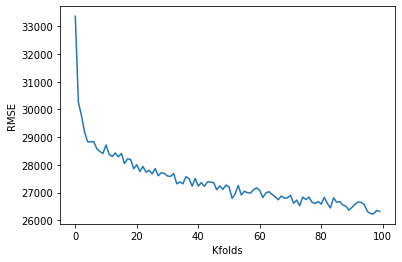

In [50]:
# On va toujours exécuter cad, tester le modele sur "AmesHousing.tsv"
data = pd.read_csv("AmesHousing.tsv", delimiter='\t')

# On va exécuter transform_features(data) qu'on mis à jour
transformed_data = transform_features(data)
# On va selectionner les bonnes "features" à l'aide de la fonction "select_features" qu'on a mis
 # à jour à la 3eme place de notre projet
final_data = select_features(transformed_data)

# On va tester sur les valeurs de k allant de 0 à 100
results = []
for i in range(100):
    result = train_and_test(final_data, k=i)
    results.append(result)
    
# Et on va tracer un graphique
x = [i for i in range(100)]
y = results 
plt.plot(x, y)
plt.xlabel('Kfolds')
plt.ylabel('RMSE')

On a fait tourner tous les "k. Et on obtient cette magnifique courbe qui est une courbe décroissante. On obtient en "abscisse" les "K-folds" et en ordonnée "la valeur d'erreur RMSE ".
Au final, la valeur de l'érreur la plus faible est atteinte pour le k le plus grand. Cette pour cette raison la validation croisée est utile pour évaluer la performance du modèle. Nous remarquons que la valeur de RMSE diminue en même temps que nous augmentons le nombre de folds K. Cad, avec un K plus grand, nous avons moins de biais, mais ça necessite plus de temps d'exécution.